<a href="https://colab.research.google.com/github/SREEHARSHA04/Machine_Learning_Practice/blob/main/Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House price prediction using regression models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
dft = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

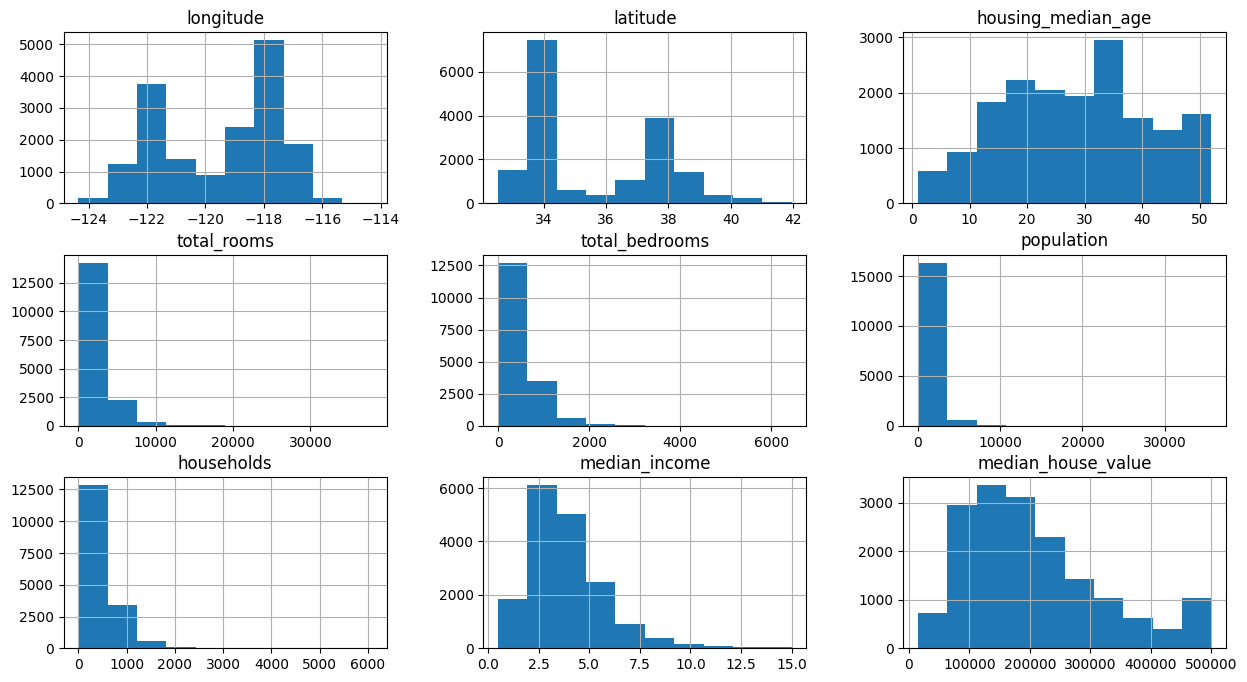

In [ ]:
new_var = df.hist(figsize=(15,8))
new_var

<Axes: >

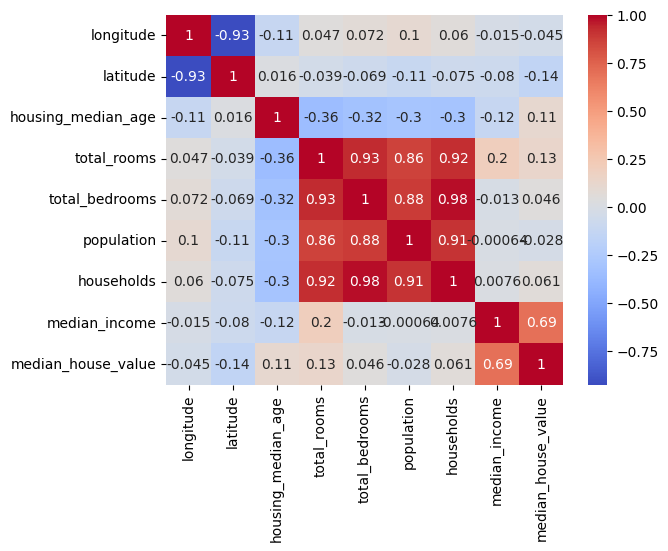

In [ ]:
## HeatMap
sns.heatmap(df.corr(),annot = True , cmap = "coolwarm")

0.23404215268309664


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

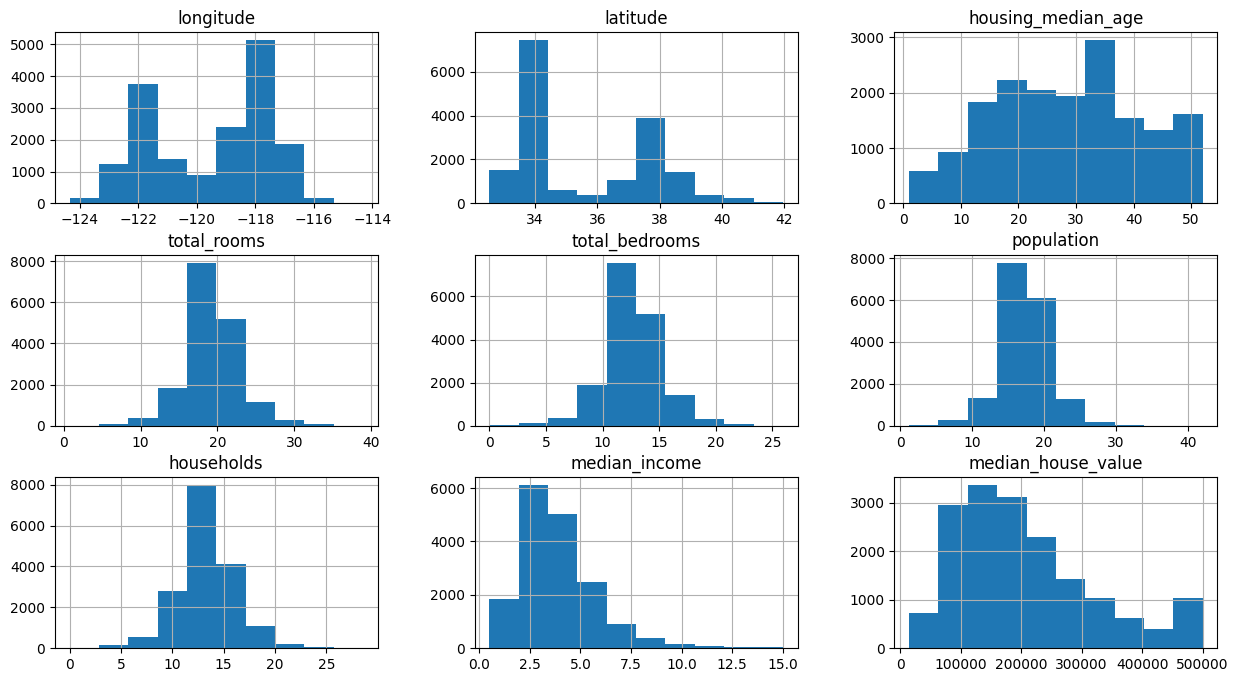

In [ ]:
## Bringing the features to normal distributions
df["total_rooms"],lambda_value  = stats.boxcox(df["total_rooms"])
df["total_bedrooms"],lambda_value  = stats.boxcox(df["total_bedrooms"])
df["population"],lambda_value  = stats.boxcox(df["population"])
df["households"],lambda_value  = stats.boxcox(df["households"])
print(lambda_value)
new_var = df.hist(figsize=(15,8))
new_var

In [ ]:
## Bringing the test features to normal distributions
dft["total_rooms"],lambda_value  = stats.boxcox(dft["total_rooms"])
dft["total_bedrooms"],lambda_value  = stats.boxcox(dft["total_bedrooms"])
dft["population"],lambda_value  = stats.boxcox(dft["population"])
dft["households"],lambda_value  = stats.boxcox(dft["households"])
print(lambda_value)

0.28967650506223735


In [ ]:
## Splittng dependent and independent variables
xt = df.iloc[:,:-1]
yt = df.iloc[:,-1]
yt.head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

In [ ]:
## Splittng dependent and independent variables for test data
xtt = dft.iloc[:,:-1]
ytt = dft.iloc[:,-1]

xt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import cross_val_score

reg = LinearRegression()
reg.fit(xt,yt)

LinearRegression()

In [ ]:
reg.score(xtt,ytt)

-0.07186167064915217

In [ ]:
## Ridge Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
parms = {'alpha':[1e-10,1e-8,1e-2,1,2,3,4,5,6,7,8,9,10,20,30,40,50]}
ridg = Lasso()
mod = GridSearchCV(ridg,parms,scoring="neg_mean_squared_error",cv = 5)
mod.fit(xt,yt)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.492e+12, tolerance: 1.902e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.964e+12, tolerance: 2.004e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.472e+11, tolerance: 1.597e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-08, 0.01, 1, 2, 3, 4, 5, 6, 7, 8,
                                   9, 10, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
mod.fit(xtt,ytt)
print(mod.best_params_)
print(mod.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.351e+11, tolerance: 3.092e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.120e+11, tolerance: 3.100e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.473e+11, tolerance: 3.086e

{'alpha': 40}
-4627222843.494528


In [ ]:
## Random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor();
rfr.fit(xt,yt)

RandomForestRegressor()

In [ ]:
rfr.score(xtt,ytt)

0.7918466318761741